<div style="background-color:#009440; padding: 0px; background-size:cover; background-opacity:50%; border-radius:5px; height: 300px">
    <div style="margin: 5px; padding: 10px;"><h1 style="color:#00000">Geophysical Data Acquisition and Analysis</h1>
    <h4 style="color:#dddddd">LMU, 05/06 August 2019</h4>
    <h4 style="color:#dddddd">Authors: Ceri Nunn, Stefanie Donner, Alice Gabriel, Céline Hadziioannou, Stephanie Wollherr, Taufiqurrahman</h4>
    </div>
    <div style="float:right; margin: 10px; padding: 20px; background:rgba(255,255,255,0.7); width: 70%; height: 150px">
        <div style="position:relative; top:30%; transform: translateY(-50%)">
            <div style="font-size: x-large; font-weight:900; color:rgba(0,0,0,0.8); line-height:100%">P03c - Mathematical Basics: Fourier Transformation, Z-transform, Hilbert Transform</div>
                    </div>
    </div>
</div>


This notebook provides some basic maths for seismic data processing and inverse problems. 
It is intended to be refreshment only.
The notebook provides some examples of the mathematics being used. We include examples of the use of the techniques in geophysics.  


Experiment with the examples. Work in groups of 
2/3, but work on your own version of the notebook

Please execute Cell 1 first:

In [1]:
# Cell 1: Preparation for programming
import warnings
warnings.filterwarnings("ignore")
%matplotlib notebook
from scipy import interpolate, signal
import numpy as np
import matplotlib.pylab as plt
# plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 8, 3

## 1) Fourier Transformation 

A Fourier transformation $F$ splits a continuous, aperiodic signal $f$ in a continuous spectrum (for example frequency spectrum. $F$ is the complex spectrum of $f$.

This transform pair forms the basis of the spectral analysis of continuous functions (inverse and forward transformation):

<img src="images/fourierint1.png" style="width: 300px; float: left;"/>


For actual data analysis it is the discrete version that plays the most important role. 

**Note the various conventions concerning the sign of the exponential 
and the constant in front of the integral!**

### Complex Fourier spectrum 

The complex spectrum can be described as:

<img src="images/complexfourier1.png" style="width: 250px; float: left;"/>
    
    

here $A$ is the amplitude spectrum and $\phi$ is the phase spectrum

### Seismological Applications of the Fourier Transform 
    
* Any filtering … low-, high-, bandpass
* Generation of random media
* Data analysis for periodic contributions 
* Tidal forcing
* Earth’s rotation
* Electromagnetic noise
* Day-night variations
* Pseudospectral methods for function approximation and derivatives 

## 2) Z-transform 

* The Z-transform converts a discrete-time signal, which is a sequence of real or complex numbers, into a complex frequency domain representation.

* The Z-domain is useful because it reduces the mathematics of passing a signal through a system to simple algebraic manipulation. 

* It can be considered as a discrete-time equivalent of the Laplace transform. The Laplace transform is very similar to the Fourier transform. While the Fourier transform of a function is a complex function of a real variable (frequency), the Laplace transform of a function is a complex function of a complex variable:

**Laplace transform**

<img src="images/laplacetransformation.png" style="width: 250px; float: left;"/>


for a complex frequency parameter $s = \sigma + i\omega$

- Laplace transform decomposes signals in time domain into exponential and sine functions. 
- $s$ is domain of Laplace functions. 
- $s$ is a complex number ie. $\sigma$ describe exponential term and $\omega$ decribe sine term 
- for example, given $s$ we can get exponential sinusoidal signal as $e^{st} = e^{(\sigma+j \omega)t} = e^{\sigma t}(cos \omega t+ j sin \omega t) $
- setting $\sigma=0$, resulting Fourier transform (frequency domain representation)

**Note** - there is an alternative definition of the z-transform as $z^{-1}$. The most common usage in Geophysics is the one we use here - where z is defined as Z-power series.  The location of zeros and poles move from inside the unit circle using one definition, to outside the unit circle using the other definition. Care must be taken to understand which definition is being used. 


**Definition:**

Suppose we have some digital, evenly spaced (in time or space, depending on the kind of data) sequence data with $N$ elements:

\begin{equation}
 x[n] = x_0, x_1, x_2, ..., x_{N-1}
\end{equation}

Then, the z-transform forms a polynomial in the complex $z$ variable, the elements of our sequence being the coefficients:

\begin{equation}
 X(z) = Zx[n] = x_0 + x_1 z + x_2 z^2 + ... + x_{N-1} z^{N-1}
\end{equation}

The z-transform come with several characteristics (see Table below). 

The **s-Shifting** of a time dependant signal is a shift by one element $\Delta t$ and in the long form looks like this: 

\begin{equation}
 zX(z) = x_0 z + x_1 z^2 + ... + x_{N-1} z^N  \qquad x_+[n] = 0, x_0, x_1, x_2, ..., a_{N-1}
\end{equation}

Similarly, the **Expansion** of a time dependant signal is a shift by several elements $k\Delta t$ and in the long form looks like this: 

\begin{equation}
 z^kX(z) = x_0 z^k + x_1 z^{2k} + ... + x_{N-1} z^{Nk} \qquad x_{k+}[n] = 0, ..., 0_k, x_0, x_1, x_2, ..., x_{N-1}
\end{equation}

The convolution, is used e.g. for describing the effect of the instrument on data. Correspondingly, we can **subtract the instrument effect on the data** by dividing the z-transform of the instrument response from the z-transform of the data IF there is no zero in the z-transform. 

**Instrument response**

The following is a generalised operation corresponding to multiplication of the z-transform by a rational function (ratio of two polynomials):

\begin{equation}
 r(z) = \frac{f(z)}{g(z)} = \frac{(z-z_0)(z-z_1)...(z-z_{N-1})}{(z-p_0)(z-p_1)...(z-p_{M-1})}
\end{equation}


That is the relationship between the output of a seismometer and the ground motion, i.,e. the instrument response. $z_N$ and $p_M$ are the so-called zeros and poles of the complex z-transform, i.,e. the roots of the two polynomials. **Instrument responses of modern seismometers** are defined by poles and zeros. We will come back to this in a later lecture at the end of the semester. 

Some useful properties:

\begin{array}
' & Time\ domain & Z-domain \\
\mathbf{Notation} & \mathbf{x[n]=Z^{-1}{X(z)}} & \mathbf{X(z)=Z{x[n]}} \\ 
Linearity & a_1x_1[n]+a_2x_2[n] & a_1X_1(z)+a_2X_2(z) \\ 
Shifting & x[n-k] & z^{-k}X(z) \\ 
Expansion &   x_K[n] = \begin{cases} x[r], & \quad n=Kr \\ 0, & \quad n \notin K\mathbb{Z}  \\   \end{cases}   & X(z^K) \\ 
Scaling\ in\ z-domain & a^nx[n] & X(a^{-1}z) \\ 
Reversal & x[-n] & X(z^{-1]}) \\ 
Complex\ conjugation & x*[n] & X*(z*) \\ 
Real\ part\ & Re(x[n]) & \frac{1}{2}[X(z)+X*(z*)]  \\ 
Imaginary\ part & Im(x[n]) & \frac{1}{2j}[X(z)-X*(z*)] \\ 
Differentiation & nx[n] & -z\frac{dX(z)}{dz} \\ 
Convolution & x_1[n] \ast x_2[n] & X_1(z)X_2(z) \\ 
Crosscorrelation & r_{x_1,x_2}=x_1^*[-n]\ast x_2[n]  & R_{x_1,x_2}(z)=X_1^*(\frac{1}{z^{*}})X_2(z)  \\ 
Accumulation & \sum_{k=-\infty}^{n}x[k] & \frac{1}{1-z^{-1}}\ X(z)  \\ 
\end{array}

Later in the course, we will look again at the transfer function for a seismometer.

## 3) Hilbert Transform


The Fourier transform is complex. Taking the transform of any real signal will result in a set of complex coefficients. Complex numbers are essentially 2D vectors, meaning they have 2 components: magnitude and phase angle. Most of the time when dealing with Fourier transforms we concentrate on the magnitude, which tells us about the distribution of signal energy through frequency. But every signal also has a **phase spectrum** and it is the phase that actually encodes the signal's structure — **the distribution of the signal energy through time.**
We don’t often examine phase spectrum as it is difficult to interpret, but we can manipulate Fourier phase to change the structure of our signal without affecting its amplitude spectrum.

The Hilbert transform is a **linear operator** that produces a 90 ̊ phase shift in a signal and it's a good first step in our exploration of phase. It is also commonly used in post-stack seismic analysis to generate the analytic signal from which we can compute the standard complex trace attributes such as envelope, instantaneous phase, and instantaneous frequency.

The definition of the Hilbert transform is rather cryptic; it is much easier to consider in terms of its Fourier transform definition. The Hilbert transform H of a signal u is related to the Fourier transform $\mathscr{F}$ like this: 



$\mathscr{F}(H(u))(\omega) = \sigma_H(\omega) \cdot \mathscr{F}(u)(\omega)$

where $\sigma_H(\omega) := \begin{cases} i &\quad \text{for } \omega<0,
\\ 0 &\quad \text{for } \omega=0,\\ -i &\quad \text{for } \omega>0.\\ \end{cases}$ 


So we apply a Hilbert transform by multiplying all negative frequencies by $i$ and all positive frequencies by $-i$, leaving any zero-frequency (DC) component untouched. This is less than intuitive but we can gain some additional insight by thinking of this geometrically.

If we multiply any complex number 𝑎 (such as a Fourier coefficient) by a second complex number 𝑏 (such as 𝜎 above) this produces a complex number 𝑐 which is 𝑎 rotated by the angle of 𝑏. So to rotate any complex number by an angle, 𝛼, multiply it by the complex number $𝑒^{𝑖𝛼} = \cos(\alpha) + 𝑖 \sin(\alpha)$.


Armed with that knowledge, and Euler's identity, $i = e^{i{\frac{\pi}{2}}}$, we see that in equation (2) above we are actually rotating the Fourier coefficients by ${\pi/2}$ or 90 degrees, and when we take the inverse Fourier transform of those modified coefficients we produce a 90 degree phase shifted version of our original signal.

Furthermore, we can generalise the definition of the Hilbert transform above to produce a phase shift to any angle, $\alpha$.

$\sigma_H(\omega) := \begin{cases} e^{i\alpha} &\quad \text{for } \omega<0,
\\ 0 &\quad \text{for } \omega=0,\\ e^{-i\alpha} &\quad \text{for } \omega>0.\\ \end{cases}$ 



Why use Hilbert Transforms? 

* Easy determination for signal envelope


### Hilbert Transform Example

In this example we use the Hilbert transform to determine the amplitude envelope and instantaneous frequency of an amplitude-modulated signal.

In [2]:
# This example originally comes from 
# https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.signal.hilbert.html
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp

In [3]:
duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs

We create a chirp of which the frequency increases from 20 Hz to 100 Hz and apply an amplitude modulation.

In [4]:
signal = chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )

In [5]:
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * fs)

<IPython.core.display.Javascript object>


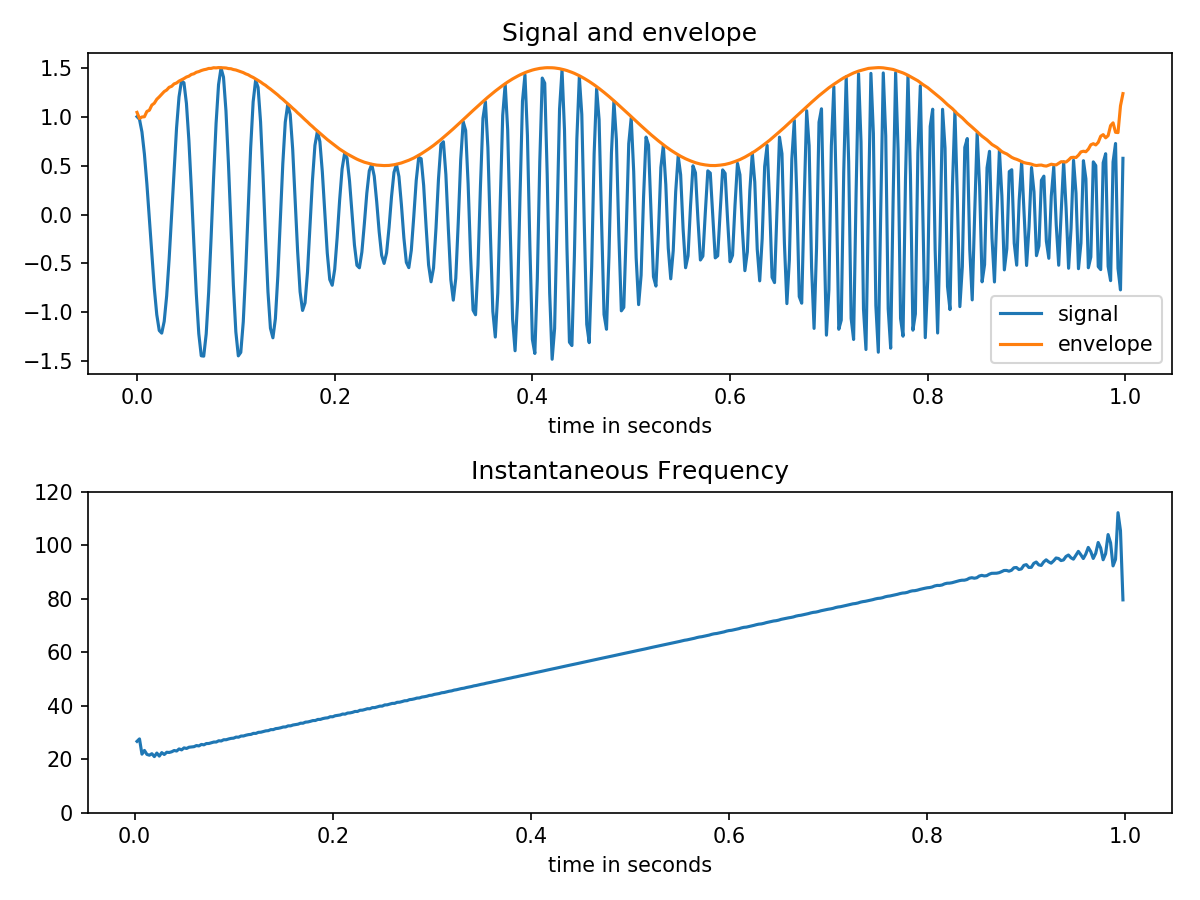

In [6]:
plt.rcParams['figure.figsize'] = 8, 6
fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax0.set_title('Signal and envelope')
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)
ax1.set_title('Instantaneous Frequency')
plt.tight_layout() 

# put the plot size back to normal
plt.rcParams['figure.figsize'] = 8, 3

### Questions

1) Look at the signal, and make sure you understand what the signal envelope and instantaneous frequency show. 

2) Predict the signal envelope and instantaneous frequency for a continuous sine wave. Now modify the code above to check whether you are correct. (Create your sine wave without a DC offset (e.g. one centred around y=0)). 

## Extra Resources:

Hilbert Transform
https://github.com/seg/tutorials-2014/blob/master/1410_Phase/purves_tutorial_long.pdf



Acknowledgements: 

The practical is based on lecture notes from Heiner Igel. 

I have used many code snippets from many locations. 
    
Hilbert Transform https://github.com/seg/tutorials-2014/blob/master/1410_Phase/purves_tutorial_long.pdf

